### just check output calc_diss on one node for different time steps, should vary in the vertical 

In [1]:
import sys
import os
sys.path.append('/home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/modules/')
import pyfesom2 as pf
import matplotlib.pyplot as plt
import numpy as np

In /global/AWIsoft/intel-python/2020.2.902/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /global/AWIsoft/intel-python/2020.2.902/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /global/AWIsoft/intel-python/2020.2.902/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /global/AWIsoft/intel-python/2020.2.902/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases

In [2]:
# resultpath = '/work/ollie/chinrich/fesom2_recom/run_test_diag/'
resultpath = '/work/ollie/chinrich/fesom2_recom/run_alk_restore_off_var_sinkvel/'
year = 1960
meshpath = '/work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz'

In [3]:
mesh = pf.load_mesh(meshpath)

/work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz/pickle_mesh_py3_fesom2


In [4]:
calc_diss = pf.get_data(resultpath, "calc_diss", year, meshpath, how=None, compute=False, 
                               runid='fesom', silent=True)

In [5]:
calc_diss.shape

(5, 126858, 47)

In [6]:
no_steps = calc_diss.shape[0]
print(no_steps)

5


In [7]:
node = 1000 #example node

In [8]:
for ind in range(no_steps):
    print('month: ',ind)
    print('calc_diss values on node ', node)
    print('\n')
    print(calc_diss.values[ind, node,:])
    print('\n')

month:  0
calc_diss values on node  1000


[0.00572259 0.00576365 0.00580471 0.00588681 0.0059689  0.00605102
 0.00613313 0.00621524 0.00629733 0.00637944 0.00646156 0.00654366
 0.00666681 0.00683102 0.00703628 0.00728263 0.00761104 0.00802157
 0.0085142  0.00908903 0.00974569 0.01048632 0.01130928 0.01221436
 0.0132017  0.01427147 0.01542306 0.01665758 0.01805619 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


month:  1
calc_diss values on node  1000


[0.00572245 0.00576351 0.00580457 0.00588666 0.00596877 0.00605088
 0.006133   0.0062151  0.00629721 0.00637931 0.00646143 0.00654355
 0.00666671 0.00683091 0.0070362  0.00728253 0.00761097 0.0080215
 0.00851414 0.00908893 0.0097457  0.01048629 0.01130925 0.01221433
 0.0132017  0.01427144 0.01542308 0.01665759 0.01805612 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.

In [9]:
i = np.where(calc_diss.values[ind, node,:] > 0)
print(i)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),)


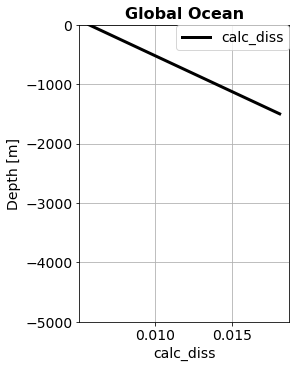

In [10]:
fig, ax = plt.subplots(1,1, figsize=(4, 5), facecolor='w', edgecolor='k', constrained_layout=True, sharey=True)



ax.plot(np.squeeze(calc_diss.values[ind, node,i]), mesh.zlev[i],label = 'calc_diss', color = 'k', lw=3)
ax.set_ylim([-5000,0])
ax.set_ylabel('Depth [m]',fontsize=14)
ax.set_xlabel('calc_diss',fontsize=14)
ax.set_title('Global Ocean',size=16, weight='bold')
ax.tick_params(labelsize=14)
ax.grid()
ax.legend(loc='best', borderaxespad=0., fontsize=14)
            